In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *


     |████████████████████████████████| 719 kB 5.1 MB/s 
     |████████████████████████████████| 365 kB 44.3 MB/s 
     |████████████████████████████████| 1.2 MB 41.6 MB/s 
     |████████████████████████████████| 4.7 MB 38.8 MB/s 
     |████████████████████████████████| 101 kB 12.4 MB/s 
     |████████████████████████████████| 115 kB 15.1 MB/s 
     |████████████████████████████████| 141 kB 52.9 MB/s 
     |████████████████████████████████| 212 kB 73.3 MB/s 
     |████████████████████████████████| 596 kB 68.9 MB/s 
     |████████████████████████████████| 127 kB 72.5 MB/s 
     |████████████████████████████████| 6.6 MB 53.0 MB/s 
Mounted at /content/gdrive


In [3]:
path = untar_data(URLs.PETS)

# 반려동물의 데이터셋을 가져옴

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
# images 폴더 안에 있는 파일을 전부 보여줌

(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_98.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_59.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_154.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_116.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_162.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_78.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_83.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_150.jpg')...]

In [6]:
fname = (path/'images').ls()[0] 
fname # British_Shorthair_163.jpg' 첫번째 파일의 경로를 가져온다.

Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_98.jpg')

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Persian']

In [8]:
# 정규표현식을 통해 레이블링 작업을 할 수 있도록 RegexLabeller 클래스를 제공한다.

pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460), # 개별 사전 크기 적용
                 batch_tfms=aug_transforms(size=244, min_scale=0.75)) # 배치 별 증강 변환에 맞춰 크기 적용

dls = pets.dataloaders(path/'images')

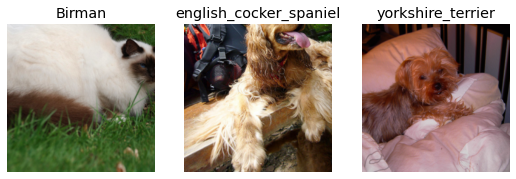

In [9]:
# 데이터블록이 정상 작동하는지 확인

dls.show_batch(nrows=1, ncols=3)

In [10]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
                  # item_tfms, batch_tfms 를 지우고 summary method 사용

pets1.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_193.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x225
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_193.jpg
    applying partial gives
      pomeranian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(28)

Final sample: (PILImage mode=RGB size=300x225, TensorCategory(28))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_it

RuntimeError: ignored

In [11]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_193.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x225
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_193.jpg
    applying partial gives
      pomeranian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(28)

Final sample: (PILImage mode=RGB size=300x225, TensorCategory(28))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_it

In [12]:
learner = cnn_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.500092,0.280450,0.089986,01:39


epoch,train_loss,valid_loss,error_rate,time
0,0.513702,0.276905,0.087957,01:47
1,0.317639,0.210508,0.063599,01:47


In [15]:
x,y = dls.one_batch()

x.shape # torch.Size([64, 3, 244, 244]) 4차원 텐서, 3은 뭐지?
y # 종속변수의 결과로 64개의 하나의 배치에 대해서 0~36개의 범주 즉, 37개의 카테고리로 세분화된 걸 알 수 있다.


TensorCategory([ 8,  8, 10, 26, 35,  3, 31, 25,  2, 20, 13, 15, 28, 14,  2, 17,  5,  6, 32, 31,  2, 22, 13,  2, 29, 35, 22, 28,  6, 30, 32, 28, 25, 24, 21, 19,  7, 11,  7,  9,  2, 22, 13,  6, 21, 14,
                 0,  4, 27,  9,  5, 35, 33, 30, 35, 25, 35,  3,  2, 20, 36, 26, 33,  5], device='cuda:0')

In [22]:
# 마지막 계층의 활성을 확인할 수 있다. 데이터셋의 인덱스로 0에는 학습, 1에는 검증을 넣는다.
preds, i = learner.get_preds(dl = [(x,y)])
i # tensor([ 8,  8, 10, 26, 35,  3, 31, 25,  2, 20, 13, 15, 28, 14,  2, 17,  5,  
  # 6, 32, 31,  2, 22, 13,  2, 29, 35, 22, 28,  6, 30, 32, 28, 25, 24, 21, 19,  
  # 7, 11,  7,  9,  2, 22, 13,  6, 21, 14,  0,  4,
  # 27,  9,  5, 35, 33, 30, 35, 25, 35,  3,  2, 20, 36, 26, 33,  5])

preds[0]

TensorBase([6.5631e-06, 1.2439e-07, 3.1016e-03, 2.7647e-06, 8.4502e-06, 5.2846e-07, 2.2866e-04, 2.4409e-05, 9.9657e-01, 6.7457e-07, 1.6821e-06, 1.9201e-06, 4.0017e-08, 1.1270e-07, 2.5248e-08,
            5.1745e-08, 1.7205e-08, 1.1127e-07, 3.1835e-07, 3.8455e-07, 1.3976e-08, 3.7856e-05, 7.3103e-07, 3.4759e-06, 2.1880e-07, 3.3649e-07, 3.1884e-08, 6.0971e-08, 1.5556e-06, 3.9599e-08,
            5.6238e-07, 2.0958e-06, 5.9669e-08, 2.9228e-07, 2.8634e-08, 1.7970e-06, 3.5864e-08])

In [23]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.))

# cross-entropy-loss

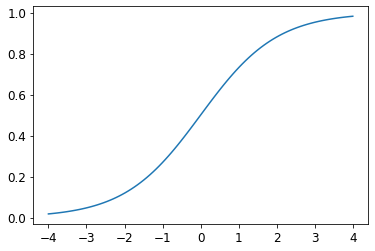

In [24]:
plot_function(torch.sigmoid, min = -4, max = 4)


In [ ]:
# 소프트 맥스는 마지막 계층의 모든 활성값이 0~1이 되도록 조정하고, 모두 더하면 1이 되도록 만들어주는 함수다.

In [30]:
examp = torch.randn((6,2))*2
examp

tensor([[-2.7693,  3.2209],
        [-1.9873, -1.8528],
        [-3.2589,  0.4160],
        [-2.4355, -0.3833],
        [ 0.0832,  1.1862],
        [ 0.2126, -0.6733]])

In [31]:
examp.sigmoid()

# 바로 시그모이드를 적용할 수 없는게 3을 의미하는 1열과, 7을 의미하는 2열의 확률의 합이 1이 되어야하기 때문이다.
# 다음 확률은 순전히 relative percentage 를 나타내는데 그친다.

tensor([[0.0590, 0.9616],
        [0.1205, 0.1355],
        [0.0370, 0.6025],
        [0.0805, 0.4053],
        [0.5208, 0.7661],
        [0.5530, 0.3378]])

In [32]:
(examp[:,0] - examp[:, 1]).sigmoid() # 3이 될 확률

tensor([0.0025, 0.4664, 0.0247, 0.1138, 0.2492, 0.7080])

In [33]:
(examp[:, 1] - examp[:, 0]).sigmoid() # 7이 될 확률 시그모이드를 통해 3이 될 확률을 구했으니 1-3이될 확률을 해도 같은 값이 나온다.

tensor([0.9975, 0.5336, 0.9753, 0.8862, 0.7508, 0.2920])

## softmax

In [34]:
from math import exp
# 이런 확률을 구하는 과정은 이진 분류에서는 간편하지만 다중분류를 해야 할 때에는 귀찮아진다.

def softmax(x):
  return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [38]:
sm_examp = torch.softmax(examp, dim=1)
sm_examp

tensor([[0.0025, 0.9975],
        [0.4664, 0.5336],
        [0.0247, 0.9753],
        [0.1138, 0.8862],
        [0.2492, 0.7508],
        [0.7080, 0.2920]])

**softmax를 사용하는 이유**

시그모이드의 다중 범주 버전으로 볼 수 있다.\
범주가 둘 이상이고 그 범주의 확률의 합이 1이어야만 하는 경우\
또는 두 범주만 있더라도 일관성을 유지하기 위해 사용하는 경우


활성의 값을 지수함수(exp)로 양수화 시키고 그 값을 전부 더해 범주마다의 지수함수 값으로 나누면
소프트맥스의 확률이 도출된다.

소프트맥스 :  ***범주의 지수함수 활성 / 모든 범주의 지수함수 활성의 합***

input에 대해 단 하나의 레이블로 분류하는 모델을 학습시키는데 이상적이다.



## log likelihood 로그 가능도

In [39]:
targ = tensor([0,1,0,1,1,0])
sm_examp

tensor([[0.0025, 0.9975],
        [0.4664, 0.5336],
        [0.0247, 0.9753],
        [0.1138, 0.8862],
        [0.2492, 0.7508],
        [0.7080, 0.2920]])

In [40]:
# 텐서의 색인기능 활용해 적절한 열을 선택할 수 있다.

idx = range(6) # 0~5
sm_examp[idx, targ]

# tensor([0.0025, 0.5336, 0.0247, 0.8862, 0.7508, 0.7080]) 1행 1열, 2행 2열, 3행 1열 ...

tensor([0.0025, 0.5336, 0.0247, 0.8862, 0.7508, 0.7080])

In [42]:
# NLL negative log likelihood

# 정확하게 sm_examp[idx, targ]과 같은 역할을 하지만 음수까지도 수용할 수 있다.
-sm_examp[idx, targ] # tensor([-0.0025, -0.5336, -0.0247, -0.8862, -0.7508, -0.7080])
F.nll_loss(sm_examp, targ, reduction='none')

tensor([-0.0025, -0.5336, -0.0247, -0.8862, -0.7508, -0.7080])